In [2]:
import numpy as np
import pandas as pd
import sys
!{sys.executable} -m pip install pandas_datareader
import pandas_datareader.data as web
import datetime as dt

!{sys.executable} -m pip install pyti
import technical_analysis as ta
import decision_profit as dp
import process_data as proc

import warnings
warnings.filterwarnings('ignore')

You should consider upgrading via the 'C:\Users\rache\OneDrive\Desktop\CFRM\521\code\my_env\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\rache\OneDrive\Desktop\CFRM\521\code\my_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2021,5,1)
tickers = ['AAPL', 'BAC', 'SPWR']
names = ['Apple', "Bank of America", "SunPower"]
dfs = proc.get_process_df(tickers, start=start, end=end)
X_trains, X_tests, y_trains, y_tests, dfs_train, dfs_test = proc.get_train_test(dfs, original=False)
X_train_subs, X_vals, y_train_subs, y_vals, dfs_train_sub, dfs_val = proc.get_train_val(dfs_train, X_trains, y_trains)

In [4]:
extra_profit_untuned = {}
extra_profit_msetune = {}
extra_profit_protune = {}

## Using default parameters
<h3> random forest

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

models = []
for i in range(len(tickers)):
    models.append(RandomForestRegressor(random_state=42))
    
# train and training set summary
dp.train_and_summary(models, names, dfs_train, X_trains, y_trains)

Training set
Apple
number of trading positions taken with actual trend: 79
number of trading positions taken with predicted trend: 337
Bank of America
number of trading positions taken with actual trend: 87
number of trading positions taken with predicted trend: 405
SunPower
number of trading positions taken with actual trend: 93
number of trading positions taken with predicted trend: 432
Training set
Apple
profit with actual trend: 213.06097216798915
profit with predicted trend: 298.85465690381767
Bank of America
profit with actual trend: 115.4669104432161
profit with predicted trend: 247.97937439503184
SunPower
profit with actual trend: 122.95292221909412
profit with predicted trend: 284.6800757220023
average MSE: 0.004292705684179393


In [5]:
# test set summary
dp.test_summary(models, names, 'RF', dfs_test, X_tests, y_tests, extra_profit_untuned, mse=True)

Test set
Apple
number of trading positions taken with actual trend: 11
number of trading positions taken with predicted trend: 55
Bank of America
number of trading positions taken with actual trend: 24
number of trading positions taken with predicted trend: 56
SunPower
number of trading positions taken with actual trend: 18
number of trading positions taken with predicted trend: 54
Test set
Apple
profit with actual trend: 144.03829362134294
profit with predicted trend: 175.03329385437198
Bank of America
profit with actual trend: 28.419497969871344
profit with predicted trend: 110.13671453028246
SunPower
profit with actual trend: 313.5157616295759
profit with predicted trend: 373.88610212846913
Average MSE RF 0.19166079328717875


<h3> extra trees

In [6]:
from sklearn.ensemble import ExtraTreesRegressor

models = []
for i in range(len(tickers)):
    models.append(ExtraTreesRegressor(random_state=42))

# train and train set summary
dp.train_and_summary(models, names, dfs_train, X_trains, y_trains)

Training set
Apple
number of trading positions taken with actual trend: 79
number of trading positions taken with predicted trend: 359
Bank of America
number of trading positions taken with actual trend: 87
number of trading positions taken with predicted trend: 407
SunPower
number of trading positions taken with actual trend: 93
number of trading positions taken with predicted trend: 450
Training set
Apple
profit with actual trend: 213.06097216798915
profit with predicted trend: 304.50637921629414
Bank of America
profit with actual trend: 115.4669104432161
profit with predicted trend: 230.2499859042742
SunPower
profit with actual trend: 122.95292221909412
profit with predicted trend: 304.5244081671328
average MSE: 1.0635086167782703e-31


In [7]:
dp.test_summary(models, names, 'ET', dfs_test, X_tests, y_tests, extra_profit_untuned, mse=True)

Test set
Apple
number of trading positions taken with actual trend: 11
number of trading positions taken with predicted trend: 55
Bank of America
number of trading positions taken with actual trend: 24
number of trading positions taken with predicted trend: 62
SunPower
number of trading positions taken with actual trend: 18
number of trading positions taken with predicted trend: 56
Test set
Apple
profit with actual trend: 144.03829362134294
profit with predicted trend: 175.03329385437198
Bank of America
profit with actual trend: 28.419497969871344
profit with predicted trend: 102.85703302913782
SunPower
profit with actual trend: 313.5157616295759
profit with predicted trend: 366.4111638834796
Average MSE ET 0.19437178425295795


<h3> Adaboost

In [7]:
from sklearn.ensemble import AdaBoostRegressor

models = []
for i in range(len(tickers)):
    models.append(AdaBoostRegressor(random_state=42))
    
# train and train set summary
dp.train_and_summary(models, names, dfs_train, X_trains, y_trains)

Training set
Apple
number of trading positions taken with actual trend: 79
number of trading positions taken with predicted trend: 179
Bank of America
number of trading positions taken with actual trend: 87
number of trading positions taken with predicted trend: 161
SunPower
number of trading positions taken with actual trend: 93
number of trading positions taken with predicted trend: 156
Training set
Apple
profit with actual trend: 213.06097216798915
profit with predicted trend: 378.5762658715409
Bank of America
profit with actual trend: 115.4669104432161
profit with predicted trend: 321.8279729752479
SunPower
profit with actual trend: 122.95292221909412
profit with predicted trend: 547.9925623829818
average MSE: 0.03187389291207017


In [11]:
dp.test_summary(models, names, 'Adaboost', dfs_test, X_tests, y_tests, extra_profit_untuned, mse=True)

Test set
Apple
number of trading positions taken with actual trend: 11
number of trading positions taken with predicted trend: 55
Bank of America
number of trading positions taken with actual trend: 24
number of trading positions taken with predicted trend: 44
SunPower
number of trading positions taken with actual trend: 18
number of trading positions taken with predicted trend: 54
Test set
Apple
profit with actual trend: 144.03829362134294
profit with predicted trend: 175.03329385437198
Bank of America
profit with actual trend: 28.419497969871344
profit with predicted trend: 104.8296367863386
SunPower
profit with actual trend: 313.5157616295759
profit with predicted trend: 373.88610212846913
Average MSE Adaboost 0.1842200346311992


<h3> gradient boosting

In [8]:
from xgboost import XGBRegressor

models = []
for i in range(len(tickers)):
    models.append(XGBRegressor(random_state=42))
    
# train and train set summary
dp.train_and_summary(models, names, dfs_train, X_trains, y_trains)

Training set
Apple
number of trading positions taken with actual trend: 79
number of trading positions taken with predicted trend: 343
Bank of America
number of trading positions taken with actual trend: 87
number of trading positions taken with predicted trend: 403
SunPower
number of trading positions taken with actual trend: 93
number of trading positions taken with predicted trend: 440
Training set
Apple
profit with actual trend: 213.06097216798915
profit with predicted trend: 312.0944233474509
Bank of America
profit with actual trend: 115.4669104432161
profit with predicted trend: 230.7333016968851
SunPower
profit with actual trend: 122.95292221909412
profit with predicted trend: 309.0414333102905
average MSE: 0.0028271980047890038


In [13]:
dp.test_summary(models, names, 'Gradient boost', dfs_test, X_tests, y_tests, extra_profit_untuned, mse=True)

Test set
Apple
number of trading positions taken with actual trend: 11
number of trading positions taken with predicted trend: 79
Bank of America
number of trading positions taken with actual trend: 24
number of trading positions taken with predicted trend: 84
SunPower
number of trading positions taken with actual trend: 18
number of trading positions taken with predicted trend: 66
Test set
Apple
profit with actual trend: 144.03829362134294
profit with predicted trend: 153.0564663522124
Bank of America
profit with actual trend: 28.419497969871344
profit with predicted trend: 118.3265714741391
SunPower
profit with actual trend: 313.5157616295759
profit with predicted trend: 370.53371358485634
Average MSE Gradient boost 0.22555575710857245


In [15]:
sum = 0
for i in extra_profit_untuned:
    sum += extra_profit_untuned[i]
print("Average extra profit achieved by untuned ensemble models are", sum / 4)

Average extra profit achieved by untuned ensemble models are 163.78229314433497


In [16]:
extra_profit_untuned

{'RF': 173.0825572923334,
 'ET': 158.32793754619925,
 'Adaboost': 167.77547954838954,
 'Gradient boost': 155.94319819041766}

## parameter tuning
<h3> random forest

In [20]:
from sklearn.metrics import mean_squared_error
from scipy.stats import randint
from itertools import product

boots = [True, False]
ns = randint.rvs(low=50, high=150, size=15, random_state=42)
max_features = randint.rvs(low=1, high=7, size=7, random_state=42)

parameters = [ns, max_features, boots]

param_list = list(product(*parameters))
best_params_rf = []

for i in range(len(tickers)):
    best_param = []
    best_score = np.inf
    for param in param_list:
        rf = RandomForestRegressor(n_estimators=param[0], max_features=param[1], bootstrap=param[2], random_state=42)
        score = dp.cv_mse(rf, i, X_train_subs, y_train_subs, X_vals, y_vals)
        if score < best_score:
            best_score = score
            best_param = param
    best_params_rf.append(best_param)
print(best_params_rf)

[(52, 3, True), (73, 4, True), (149, 3, True)]


In [21]:
best_params_rf = [(52, 3, True), (73, 4, True), (149, 3, True)]
best_models_rf = []

for i in range(len(tickers)):
    best_models_rf.append(RandomForestRegressor(n_estimators=best_params_rf[i][0], 
                                           max_features=best_params_rf[i][1],
                                           bootstrap=best_params_rf[i][2],
                                            random_state=42).fit(X_trains[i], y_trains[i]))

print("random forest results using the parameters that yields the lowest MSE")
dp.test_summary(best_models_rf, names, 'RF', dfs_test, X_tests, y_tests, extra_profit_msetune, mse=True)

random forest results using the parameters that yields the lowest MSE
Test set
Apple
number of trading positions taken with actual trend: 11
number of trading positions taken with predicted trend: 55
Bank of America
number of trading positions taken with actual trend: 24
number of trading positions taken with predicted trend: 44
SunPower
number of trading positions taken with actual trend: 18
number of trading positions taken with predicted trend: 56
Test set
Apple
profit with actual trend: 144.03829362134294
profit with predicted trend: 175.03329385437198
Bank of America
profit with actual trend: 28.419497969871344
profit with predicted trend: 104.8296367863386
SunPower
profit with actual trend: 313.5157616295759
profit with predicted trend: 371.57618392084436
Average MSE RF 0.19161229435042984


In [22]:
best_params_et = []

for i in range(len(tickers)):
    best_param = []
    best_score = np.inf
    for param in param_list:
        et = ExtraTreesRegressor(n_estimators=param[0], max_features=param[1], bootstrap=param[2], random_state=42)
        score = dp.cv_mse(et, i, X_train_subs, y_train_subs, X_vals, y_vals)
        if score < best_score:
            best_score = score
            best_param = param
    best_params_et.append(best_param)

print("extra trees parameters that yields smallest MSE for each security:", best_params_et)

extra trees parameters that yields smallest MSE for each security: [(52, 3, True), (142, 4, True), (132, 2, True)]


In [24]:
best_params_et = [(52, 3, True), (142, 4, True), (132, 2, True)]
best_models_et = []

for i in range(len(tickers)):
    best_models_et.append(ExtraTreesRegressor(n_estimators=best_params_et[i][0], 
                                           max_features=best_params_et[i][1],
                                           bootstrap=best_params_et[i][2],
                                         random_state=42).fit(X_trains[i], y_trains[i]))

print("extra trees results using the parameters that yields the lowest MSE")
dp.test_summary(best_models_et, names, 'ET', dfs_test, X_tests, y_tests, extra_profit_msetune, mse=True)   

extra trees results using the parameters that yields the lowest MSE
Test set
Apple
number of trading positions taken with actual trend: 11
number of trading positions taken with predicted trend: 55
Bank of America
number of trading positions taken with actual trend: 24
number of trading positions taken with predicted trend: 50
SunPower
number of trading positions taken with actual trend: 18
number of trading positions taken with predicted trend: 54
Test set
Apple
profit with actual trend: 144.03829362134294
profit with predicted trend: 171.56835142155518
Bank of America
profit with actual trend: 28.419497969871344
profit with predicted trend: 105.28454419962759
SunPower
profit with actual trend: 313.5157616295759
profit with predicted trend: 373.88610212846913
Average MSE ET 0.19213655841245184


In [23]:
loss = ['linear', 'square', 'exponential']
ns = randint.rvs(low=30, high=120, size=20, random_state=42)
parameters = [ns, loss]
param_list = list(product(*parameters))
best_params_ab = []

for i in range(len(tickers)):
    best_param = []
    best_score = np.inf
    for param in param_list:
        ab = AdaBoostRegressor(n_estimators=param[0], loss=param[1], random_state=42)
        score = dp.cv_mse(et, i, X_train_subs, y_train_subs, X_vals, y_vals)
        if score < best_score:
            best_score = score
            best_param = param
    best_params_ab.append(best_param)

print("adaboost parameters that yields smallest MSE for each security:", best_params_ab)

adaboost parameters that yields smallest MSE for each security: [(81, 'linear'), (81, 'linear'), (81, 'linear')]


In [38]:
best_params_ab = [(81, 'linear'), (81, 'linear'), (81, 'linear')]
best_models_ab = []

for i in range(len(tickers)):
    best_models_ab.append(AdaBoostRegressor(n_estimators=best_params_ab[i][0], 
                                            loss=best_params_ab[i][1], random_state=42).fit(X_trains[i], y_trains[i]))

print("adaboost results using the parameters that yields the lowest MSE")
dp.test_summary(best_models_ab, names, 'adaboost', dfs_test, X_tests, y_tests, extra_profit_msetune, mse=True)   

adaboost results using the parameters that yields the lowest MSE
Test set
Apple
number of trading positions taken with actual trend: 11
number of trading positions taken with predicted trend: 55
Bank of America
number of trading positions taken with actual trend: 24
number of trading positions taken with predicted trend: 44
SunPower
number of trading positions taken with actual trend: 18
number of trading positions taken with predicted trend: 54
Test set
Apple
profit with actual trend: 144.03829362134294
profit with predicted trend: 175.03329385437198
Bank of America
profit with actual trend: 28.419497969871344
profit with predicted trend: 104.8296367863386
SunPower
profit with actual trend: 313.5157616295759
profit with predicted trend: 373.88610212846913
Average MSE adaboost 0.1842200346311992


In [13]:
max_depths = np.arange(2, 8)
ns = randint.rvs(low=30, high=120, size=20, random_state=42)

parameters = [ns, max_depths]
param_list = list(product(*parameters))
best_params_xgb = []

for i in range(len(tickers)):
    best_param = []
    best_score = np.inf
    for param in param_list:
        xgb = XGBRegressor(n_estimators=param[0], max_depths=param[1], random_state=42)
        score = 0
        for j in range(len(X_train_subs[i])):
            xgb.fit(X_train_subs[i][j], y_train_subs[i][j])
            y_pred = xgb.predict(X_vals[i][j])
            score += np.sqrt(mean_squared_error(y_pred, y_vals[i][j]))

        if score < best_score:
            best_score = score
            best_param = param
    best_params_xgb.append(best_param)

[14:48:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:48:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:48:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:48:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:48:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:48:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:48:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:48:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:48:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:48:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:48:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:48:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:48:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:48:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:49:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:49:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:49:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:49:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:49:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:49:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:49:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:49:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:49:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:49:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:49:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:49:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:49:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:49:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:49:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:49:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:49:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:50:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:50:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:50:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:50:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:50:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:50:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:50:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:50:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[14:50:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:50:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

In [14]:
print("gradient boost parameters that yields smallest MSE for each security:", best_params_xgb)

gradient boost parameters that yields smallest MSE for each security: [(31, 2), (31, 2), (31, 2)]


In [26]:
best_params_xgb = [(31, 2), (31, 2), (31, 2)]
best_models_xgb = []

for i in range(len(tickers)):
    best_models_xgb.append(XGBRegressor(n_estimators=best_params_xgb[i][0], 
                                        max_depth=best_params_xgb[i][1], random_state=42).fit(X_trains[i], y_trains[i]))

print("gradient boost results using the parameters that yields the lowest MSE")
dp.test_summary(best_models_xgb, names, 'Gradient boost', dfs_test, X_tests, y_tests, extra_profit_msetune, mse=True)   

gradient boost results using the parameters that yields the lowest MSE
Test set
Apple
number of trading positions taken with actual trend: 11
number of trading positions taken with predicted trend: 55
Bank of America
number of trading positions taken with actual trend: 24
number of trading positions taken with predicted trend: 44
SunPower
number of trading positions taken with actual trend: 18
number of trading positions taken with predicted trend: 54
Test set
Apple
profit with actual trend: 144.03829362134294
profit with predicted trend: 175.03329385437198
Bank of America
profit with actual trend: 28.419497969871344
profit with predicted trend: 104.8296367863386
SunPower
profit with actual trend: 313.5157616295759
profit with predicted trend: 373.88610212846913
Average MSE Gradient boost 0.19066245576936813


In [27]:
extra_profit_msetune

{'RF': 165.46556134076476,
 'ET': 164.76544452886174,
 'adaboost': 167.77547954838954,
 'Gradient boost': 167.77547954838954}

In [ ]:
sum = 0
for i in extra_profit_msetune:
    sum += extra_profit_msetune[i]
print("Average extra profit achieved by mse-tuned ensemble models are", sum / 4)

<h3> tune parameters using profit

In [31]:
best_params_rf1 = []

for i in range(len(tickers)):
    best_profit = 0
    for param in param_list:
        rf = RandomForestRegressor(n_estimators=param[0], max_features=param[1], bootstrap=param[2], random_state=42)
        profit = dp.cv_profit(rf, i, dfs_train_sub, dfs_val, X_train_subs, y_train_subs, X_vals, y_vals)
        if profit > best_profit:
            best_profit = profit
            best_param = param
    best_params_rf1.append(best_param)

print("random forest parameters that yield the highest profit on each security:", best_params_rf1)

random forest parameters that yield the highest profit on each security: [(136, 2, True), (132, 2, True), (70, 5, True)]


In [44]:
best_params_rf1 = [(136, 2, True), (132, 2, True), (70, 5, True)]

best_models_rf1 = []
for i in range(len(tickers)):
    best_models_rf1.append(RandomForestRegressor(n_estimators=best_params_rf1[i][0], 
                                           max_features=best_params_rf1[i][1],
                                           bootstrap=best_params_rf1[i][2],
                                            random_state=42).fit(X_trains[i], y_trains[i]))

print("random forest results using the parameters that yields the highest profit")
dp.test_summary(best_models_rf1, names, 'RF', dfs_test, X_tests, y_tests, extra_profit_protune, mse=True)

random forest results using the parameters that yields the highest profit
Test set
Apple
number of trading positions taken with actual trend: 11
number of trading positions taken with predicted trend: 61
Bank of America
number of trading positions taken with actual trend: 24
number of trading positions taken with predicted trend: 44
SunPower
number of trading positions taken with actual trend: 18
number of trading positions taken with predicted trend: 56
Test set
Apple
profit with actual trend: 144.03829362134294
profit with predicted trend: 175.62603487960922
Bank of America
profit with actual trend: 28.419497969871344
profit with predicted trend: 104.8296367863386
SunPower
profit with actual trend: 313.5157616295759
profit with predicted trend: 371.57618392084436
Average MSE RF 0.19556380933629325


In [32]:
best_params_et1 = []

for i in range(len(tickers)):
    best_profit = 0
    for param in param_list:
        et = ExtraTreesRegressor(n_estimators=param[0], max_features=param[1], bootstrap=param[2], random_state=42)
        profit = dp.cv_profit(et, i, dfs_train_sub, dfs_val, X_train_subs, y_train_subs, X_vals, y_vals)
        if profit > best_profit:
            best_profit = profit
            best_param = param
    best_params_et1.append(best_param)
    
print("extra trees parameters that yield the highest profit on each security:", best_params_et1)

extra trees parameters that yield the highest profit on each security: [(110, 2, True), (101, 3, True), (73, 5, True)]


In [34]:
best_params_et1 = [(110, 2, True), (101, 3, True), (73, 5, True)]

best_models_et1 = []
for i in range(len(tickers)):
    best_models_et1.append(RandomForestRegressor(n_estimators=best_params_et1[i][0], 
                                           max_features=best_params_et1[i][1],
                                           bootstrap=best_params_et1[i][2],
                                            random_state=42).fit(X_trains[i], y_trains[i]))

print("extra trees results using the parameters that yields the highest profit")
dp.test_summary(best_models_et1, names, 'ET', dfs_test, X_tests, y_tests, extra_profit_protune, mse=True)

extra trees results using the parameters that yields the highest profit
Test set
Apple
number of trading positions taken with actual trend: 11
number of trading positions taken with predicted trend: 59
Bank of America
number of trading positions taken with actual trend: 24
number of trading positions taken with predicted trend: 44
SunPower
number of trading positions taken with actual trend: 18
number of trading positions taken with predicted trend: 56
Test set
Apple
profit with actual trend: 144.03829362134294
profit with predicted trend: 172.00693440277556
Bank of America
profit with actual trend: 28.419497969871344
profit with predicted trend: 104.8296367863386
SunPower
profit with actual trend: 313.5157616295759
profit with predicted trend: 371.57618392084436
Average MSE ET 0.1947194081381208


In [35]:
loss = ['linear', 'square', 'exponential']
ns = randint.rvs(low=30, high=120, size=20, random_state=42)
parameters = [ns, loss]
param_list = list(product(*parameters))
best_params_ab1 = []

for i in range(len(tickers)):
    best_profit = 0
    for param in param_list:
        ab = AdaBoostRegressor(n_estimators=param[0], loss=param[1], random_state=42)
        profit = dp.cv_profit(ab, i, dfs_train_sub, dfs_val, X_train_subs, y_train_subs, X_vals, y_vals)
        if profit > best_profit:
            best_profit = profit
            best_param = param
    best_params_ab1.append(best_param)
print("adaboost parameters that yield the highest profit on each security:", best_params_ab1)

adaboost parameters that yield the highest profit on each security: [(81, 'linear'), (31, 'square'), (82, 'square')]


In [37]:
best_params_ab1 = [(81, 'linear'), (31, 'square'), (82, 'square')]
best_models_ab1 = []
for i in range(len(tickers)):
    best_models_ab1.append(AdaBoostRegressor(n_estimators=best_params_ab1[i][0], 
                                            loss=best_params_ab1[i][1], random_state=42).fit(X_trains[i], y_trains[i]))

print("adaboost results using the parameters that yields the highest profit")
dp.test_summary(best_models_ab1, names, 'Adaboost', dfs_test, X_tests, y_tests, extra_profit_protune, mse=True)

adaboost results using the parameters that yields the highest profit
Test set
Apple
number of trading positions taken with actual trend: 11
number of trading positions taken with predicted trend: 55
Bank of America
number of trading positions taken with actual trend: 24
number of trading positions taken with predicted trend: 44
SunPower
number of trading positions taken with actual trend: 18
number of trading positions taken with predicted trend: 54
Test set
Apple
profit with actual trend: 144.03829362134294
profit with predicted trend: 175.03329385437198
Bank of America
profit with actual trend: 28.419497969871344
profit with predicted trend: 104.8296367863386
SunPower
profit with actual trend: 313.5157616295759
profit with predicted trend: 373.88610212846913
Average MSE Adaboost 0.18322387749654423


In [36]:
max_depths = np.arange(2, 8)
ns = randint.rvs(low=30, high=120, size=20, random_state=42)

parameters = [ns, max_depths]
param_list = list(product(*parameters))
best_params_xgb1 = []

for i in range(len(tickers)):
    best_profit = 0
    for param in param_list:
        xgb = XGBRegressor(n_estimators=param[0], max_depths=param[1], random_state=42)
        profit = dp.cv_profit(xgb, i, dfs_train_sub, dfs_val, X_train_subs, y_train_subs, X_vals, y_vals)
        if profit > best_profit:
            best_profit = profit
            best_param = param
    best_params_xgb1.append(best_param)

[00:12:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[00:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:36:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:36:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[00:54:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:55:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:56:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[01:22:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:23:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:24:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[01:40:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:41:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:42:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[02:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:13:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:14:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[02:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:45:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:46:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[03:13:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:15:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:16:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[03:45:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:47:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[04:04:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:04:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[04:15:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:15:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:16:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[04:32:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:33:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:34:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[04:48:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:48:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:49:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[05:16:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:17:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[05:35:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:36:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:36:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[05:51:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:52:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:52:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[06:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:10:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:12:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[06:39:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:40:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:41:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[06:55:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:56:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:57:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[07:24:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:25:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:26:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[07:46:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:47:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:47:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[08:11:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:12:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:14:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

[08:45:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:46:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depths" } might not be used.

  This may not be accurate due to some parameters are only used in la

KeyboardInterrupt: 

In [42]:
print("gradient boost parameters that yield the highest profit on each security:", best_params_xgb1)

gradient boost parameters that yield the highest profit on each security: [(50, 2), (59, 2), (101, 2)]


In [41]:
best_params_xgb1 = [(50, 2), (59, 2), (101, 2)]
best_models_xgb1 = []

for i in range(len(tickers)):
    best_models_xgb1.append(XGBRegressor(n_estimators=best_params_xgb1[i][0], 
                                        max_depth=best_params_xgb1[i][1], random_state=42).fit(X_trains[i], y_trains[i]))

print("gradient boost results using the parameters that yields the highest profit")
dp.test_summary(best_models_xgb1, names, 'Gradient boost', dfs_test, X_tests, y_tests, extra_profit_protune, mse=True)

gradient boost results using the parameters that yields the highest profit
Test set
Apple
number of trading positions taken with actual trend: 11
number of trading positions taken with predicted trend: 55
Bank of America
number of trading positions taken with actual trend: 24
number of trading positions taken with predicted trend: 46
SunPower
number of trading positions taken with actual trend: 18
number of trading positions taken with predicted trend: 58
Test set
Apple
profit with actual trend: 144.03829362134294
profit with predicted trend: 175.03329385437198
Bank of America
profit with actual trend: 28.419497969871344
profit with predicted trend: 106.96727933528824
SunPower
profit with actual trend: 313.5157616295759
profit with predicted trend: 360.37385412671375
Average MSE Gradient boost 0.19780445522815557


In [45]:
extra_profit_protune

{'ET': 162.43920188916834,
 'Adaboost': 167.77547954838954,
 'Gradient boost': 156.4008740955838,
 'RF': 166.058302366002}

In [47]:
sum2 = 0
for i in extra_profit_protune:
    sum2 += extra_profit_protune[i]
print("Average extra profit achieved by profit-tuned ensemble models are", sum2 / 4)

Average extra profit achieved by profit-tuned ensemble models are 163.16846447478594


## Blending the best of each category

<h3> models: SVR pipeline, KNN, Random Forest, Extra trees, Adaboost, Gradient Boost </h3>

<h3> using best models from error metrics

In [12]:
def get_blender_trained(models, blender_choice=XGBRegressor(random_state=42)):
    cv_predicts = []
    sub_length = y_vals[0][0].shape[0]

    for i in range(len(X_train_subs[0])):
        cv_predict = np.zeros((sub_length * 5, len(models[i])))
        for j in range(len(X_train_subs)):
            for k in range(len(models[i])):
                models[i][k].fit(X_train_subs[j][i], y_train_subs[j][i])
                cv_predict[j * sub_length: (j+1) * sub_length, k] = models[i][k].predict(X_vals[j][i])
        cv_predicts.append(cv_predict)
    
    blenders = []
    y_blender_trains = [y_train[-sub_length * 5:] for y_train in y_trains]
    for i in range(len(tickers)):
        blender = blender_choice
        blender.fit(cv_predicts[i], y_blender_trains[i])
        blenders.append(blender)
    
    return blenders

def get_blender_output(models, blenders):
    otr_preds = []
    for i in range(len(tickers)):
        test_predict = np.zeros((len(y_tests[i]), len(models[i])))
        for j in range(len(models[i])):
            test_predict[:, j] = models[i][j].predict(X_tests[i])
        y_pred = blenders[i].predict(test_predict)
        otr_preds.append(y_pred)
    return otr_preds

def get_positions_blender(dfs, otr_preds):
    position_actual, position_pred = [], []
    
    for i in range(len(dfs)):
        trend_pred = ta.predicted_trend(dfs[i], otr_preds[i])
        dfs[i]['trend_pred'] = trend_pred
        pa = dp.trading_decision(dfs[i]['trend'].values)
        pp = dp.trading_decision(dfs[i]['trend_pred'].values)
        position_actual.append(pa)
        position_pred.append(pp)
    
    return position_actual, position_pred

In [15]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

models = []

best_params_rf = [(52, 3, True), (73, 4, True), (149, 3, True)]
best_params_et = [(52, 3, True), (142, 4, True), (132, 2, True)]
best_params_ab = [(81, 'linear'), (81, 'linear'), (81, 'linear')]
best_params_xgb = [(31, 2), (31, 2), (31, 2)]

for i in range(len(tickers)):
    model = []
    model.append(Pipeline([('scaler', StandardScaler()), 
                        ('svr', SVR())]))
    model.append(Pipeline([('scaler', StandardScaler()), 
                        ('knn', KNeighborsRegressor())]))

    model.append(RandomForestRegressor(n_estimators=best_params_rf[i][0],
                                       max_features=best_params_rf[i][1],
                                    bootstrap=best_params_rf[i][2],
                                      random_state=42))
    model.append(ExtraTreesRegressor(n_estimators=best_params_et[i][0],
                                       max_features=best_params_et[i][1],
                                    bootstrap=best_params_et[i][2],
                                    random_state=42))
    model.append(AdaBoostRegressor(n_estimators=best_params_ab[i][0],
                                       loss=best_params_ab[i][1],
                                  random_state=42))
    model.append(XGBRegressor(n_estimators=best_params_xgb[i][0],
                                       max_depth=best_params_xgb[i][1],
                             random_state=42))
    models.append(model)
    

In [50]:
blenders = get_blender_trained(models)
otr_preds = get_blender_output(models, blenders)
actual_positions, predicted_positions = dp.get_positions_blender(dfs_test, otr_preds)
print("all 6 models w/ mse-tuned ensemble models")
dp.position_summary(names, actual_positions, predicted_positions, dfs_test, training=False)
actual_profit, predicted_profit = dp.profit_summary(names, dfs_test)
extra_blender = np.sum(np.array(predicted_profit) - np.array(actual_profit))
extra_blender

all 6 models w/ mse-tuned ensemble models
Test set
Apple
number of trading positions taken with actual trend: 11
number of trading positions taken with predicted trend: 59
Bank of America
number of trading positions taken with actual trend: 24
number of trading positions taken with predicted trend: 72
SunPower
number of trading positions taken with actual trend: 18
number of trading positions taken with predicted trend: 78
Training set
Apple
profit with actual trend: 144.03829362134294
profit with predicted trend: 174.12863220388076
Bank of America
profit with actual trend: 28.419497969871344
profit with predicted trend: 117.04609552587378
SunPower
profit with actual trend: 313.5157616295759
profit with predicted trend: 344.7408026707174


149.94197717968177

In [16]:
from itertools import combinations

model_names = ['SVR', 'KNN', 'Random Forest', 'Extra Trees', 'Adaboost', 'Gradient Boost']
blenders = [RandomForestRegressor(random_state=42), ExtraTreesRegressor(random_state=42), 
            AdaBoostRegressor(random_state=42), XGBRegressor(random_state=42)]
def pick_n_models(models, n):
    highest_profit = 0
    best_combo = []
    best_blender = ''
    all_combo_n = np.array(list(combinations(np.arange(6), n)))
    
    a = 0
    
    for combos in all_combo_n:
        for blender in blenders:
            mods = []
            for i in range(len(tickers)):
                mod = []
                for j in combos:
                    mod.append(models[i][j])
                mods.append(mod)

            blends = get_blender_trained(mods, blender)
            otr_preds = get_blender_output(mods, blends)

            actual_positions, predicted_positions = get_positions_blender(dfs_test, otr_preds)
            dp.position_summary(names, actual_positions, predicted_positions, dfs_test, printing=False, training=False)
            actual_profit, predicted_profit = dp.profit_summary(names, dfs_test, printing=False)
            profit = np.sum(np.array(predicted_profit) - np.array(actual_profit))
            if profit > highest_profit:
                highest_profit = profit
                best_combo = combos
                best_blender = str(blender)
        
    best_models = ''
    for i in best_combo:
        best_models += model_names[i] + '  '
    
    print('Best combinations of', n, ' models')
    print('models:', best_models)
    print('blender:', str(best_blender))
    print(highest_profit)


In [17]:
for i in range(2,6):
    pick_n_models(models, i)

Best combinations of 2  models
models: Extra Trees  Adaboost  
blender: ExtraTreesRegressor(random_state=42)
176.73985794996676
Best combinations of 3  models
models: SVR  Random Forest  Adaboost  
blender: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
197.16394306735978
Best combinations of 4  models
models: SVR  Random Forest  Adaboost  Gradient Boost  
blender: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, col

In [19]:
best = []

for i in range(len(tickers)):
    best.append([models[i][0], models[i][2], models[i][4]])
    
blends = get_blender_trained(best)
otr_preds = get_blender_output(best, blends)
errors = [mean_squared_error(otr_preds[i],  y_tests[i]) for i in range(3)]
print("best stacking and blending model using mse-tuned parameters")
print("average MSE across all signal predictions:", np.mean(errors))
      
actual_positions, predicted_positions = dp.get_positions_blender(dfs_test, otr_preds)
dp.position_summary(names, actual_positions, predicted_positions, dfs_test, training=False)
actual_profit, predicted_profit = dp.profit_summary(names, dfs_test)
np.sum(np.array(predicted_profit) - np.array(actual_profit))

best stacking and blending model using mse-tuned parameters
average MSE across all signal predictions: 0.046945112390731264
Test set
Apple
number of trading positions taken with actual trend: 11
number of trading positions taken with predicted trend: 69
Bank of America
number of trading positions taken with actual trend: 24
number of trading positions taken with predicted trend: 82
SunPower
number of trading positions taken with actual trend: 18
number of trading positions taken with predicted trend: 90
Training set
Apple
profit with actual trend: 144.03829362134294
profit with predicted trend: 174.12178254235334
Bank of America
profit with actual trend: 28.419497969871344
profit with predicted trend: 98.34482183573485
SunPower
profit with actual trend: 313.5157616295759
profit with predicted trend: 410.67089191006175


197.16394306735978

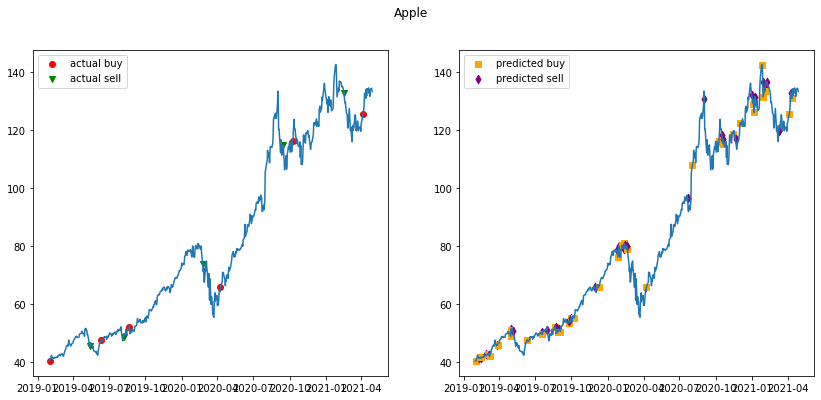

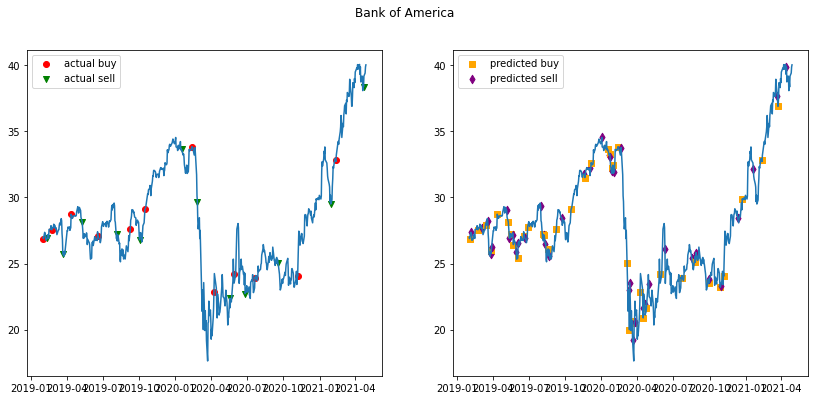

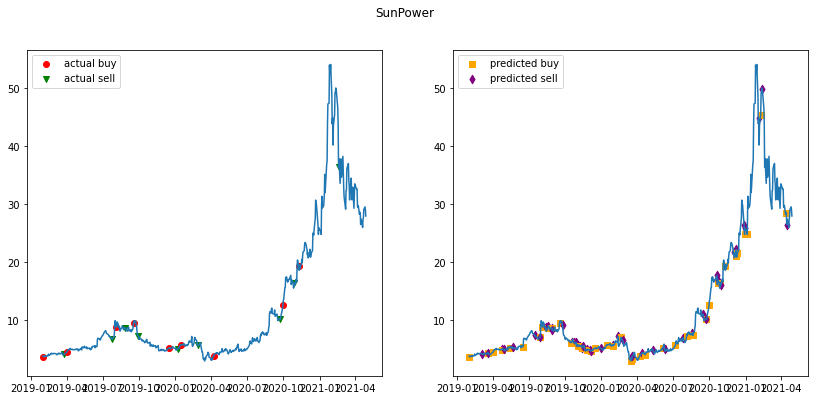

In [20]:
for i in range(len(tickers)):
    dp.plot_signals(dfs_test[i], names[i])

<h3> using models tuned by profits

In [21]:
models1 = []

best_params_rf1 = [(136, 2, True), (132, 2, True), (70, 5, True)]
best_params_et1 = [(110, 2, True), (101, 3, True), (73, 5, True)]
best_params_ab1 = [(81, 'linear'), (31, 'square'), (82, 'square')]
best_params_xgb1 =  [(50, 2), (59, 2), (101, 2)]

for i in range(len(tickers)):
    model = []
    model.append(Pipeline([('scaler', StandardScaler()), 
                        ('svr', SVR())]))
    model.append(Pipeline([('scaler', StandardScaler()), 
                        ('knn', KNeighborsRegressor())]))

    model.append(RandomForestRegressor(n_estimators=best_params_rf1[i][0],
                                       max_features=best_params_rf1[i][1],
                                    bootstrap=best_params_rf1[i][2],
                                      random_state=42))
    model.append(ExtraTreesRegressor(n_estimators=best_params_et1[i][0],
                                       max_features=best_params_et1[i][1],
                                    bootstrap=best_params_et1[i][2],
                                    random_state=42))
    model.append(AdaBoostRegressor(n_estimators=best_params_ab1[i][0],
                                       loss=best_params_ab1[i][1],
                                  random_state=42))
    model.append(XGBRegressor(n_estimators=best_params_xgb1[i][0],
                                       max_depth=best_params_xgb1[i][1],
                             random_state=42))
    models1.append(model)
    

In [22]:
blenders = get_blender_trained(models1)
otr_preds = get_blender_output(models1, blenders)
#actual_positions, predicted_positions = get_positions_blender(dfs_test, otr_preds)
actual_positions, predicted_positions = dp.get_positions_blender(dfs_test, otr_preds)
print("all 6 models w/ profit-tuned ensemble models")
dp.position_summary(names, actual_positions, predicted_positions, dfs_test, training=False)
actual_profit, predicted_profit = dp.profit_summary(names, dfs_test)
extra_blender = np.sum(np.array(predicted_profit) - np.array(actual_profit))
extra_blender

all 6 models w/ profit-tuned ensemble models
Test set
Apple
number of trading positions taken with actual trend: 11
number of trading positions taken with predicted trend: 77
Bank of America
number of trading positions taken with actual trend: 24
number of trading positions taken with predicted trend: 73
SunPower
number of trading positions taken with actual trend: 18
number of trading positions taken with predicted trend: 82
Training set
Apple
profit with actual trend: 144.03829362134294
profit with predicted trend: 154.64605739470628
Bank of America
profit with actual trend: 28.419497969871344
profit with predicted trend: 94.78890142152119
SunPower
profit with actual trend: 313.5157616295759
profit with predicted trend: 328.7900444367311


92.25145003216838

In [23]:
for i in range(2,6):
    pick_n_models(models1, i)

Best combinations of 2  models
models: Random Forest  Extra Trees  
blender: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
210.4638479193098
Best combinations of 3  models
models: Random Forest  Adaboost  Gradient Boost  
blender: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.30000

In [26]:
best1 = []

for i in range(len(tickers)):
    best1.append([models1[i][2], models1[i][4], models1[i][5]])
    
blends1 = get_blender_trained(best1)
otr_preds1 = get_blender_output(best1, blends1)
errors = [mean_squared_error(otr_preds1[i],  y_tests[i]) for i in range(3)]
print("best stacking and blending model using profit-tuned parameters")
print("average MSE across all signal predictions:", np.mean(errors))
      
actual_positions, predicted_positions = dp.get_positions_blender(dfs_test, otr_preds1)
dp.position_summary(names, actual_positions, predicted_positions, dfs_test, training=False)
actual_profit, predicted_profit = dp.profit_summary(names, dfs_test)
np.sum(np.array(predicted_profit) - np.array(actual_profit))

best stacking and blending model using profit-tuned parameters
average MSE across all signal predictions: 0.06202169134050556
Test set
Apple
number of trading positions taken with actual trend: 11
number of trading positions taken with predicted trend: 71
Bank of America
number of trading positions taken with actual trend: 24
number of trading positions taken with predicted trend: 132
SunPower
number of trading positions taken with actual trend: 18
number of trading positions taken with predicted trend: 80
Training set
Apple
profit with actual trend: 144.03829362134294
profit with predicted trend: 171.76589584953098
Bank of America
profit with actual trend: 28.419497969871344
profit with predicted trend: 146.22367074896175
SunPower
profit with actual trend: 313.5157616295759
profit with predicted trend: 390.51510452229024


222.5311178999928

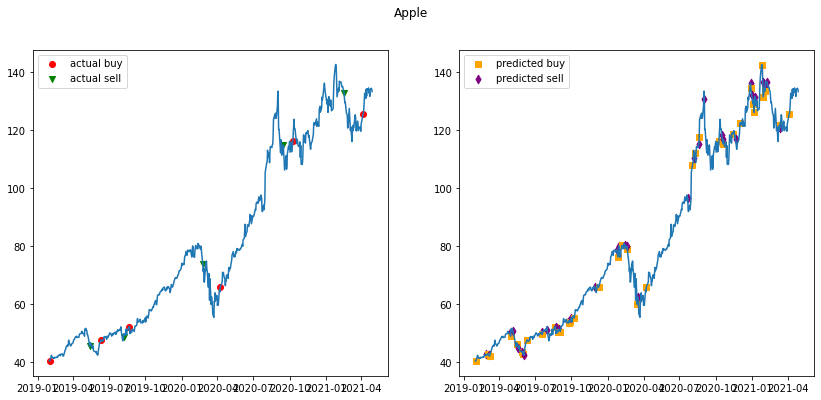

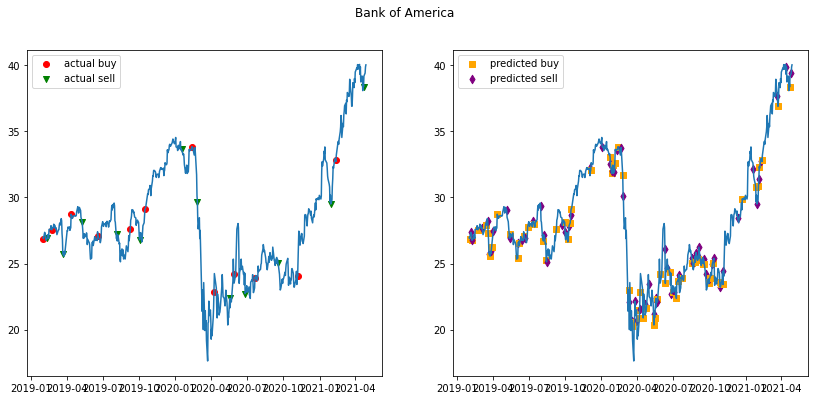

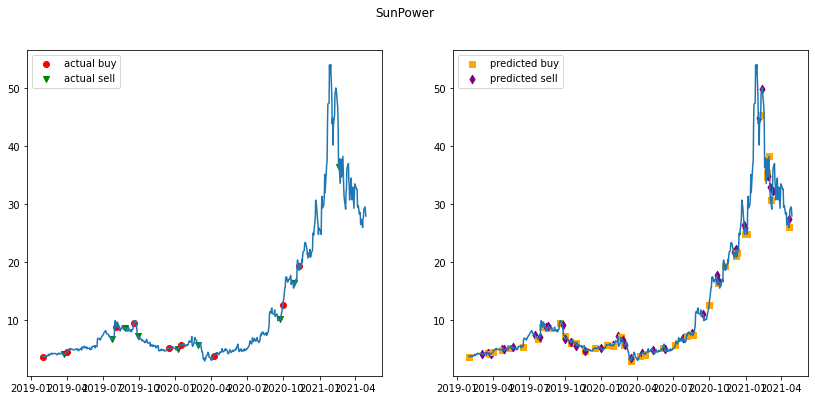

In [27]:
for i in range(len(tickers)):
    dp.plot_signals(dfs_test[i], names[i])

the highest total extra profit achieved by using SVR, KNN, Random Forest, and Gradient Boost as stacking models and gradient boost as the blender.

Notice that the models here are not trained on a variety of stocks and time periods, and they are not representative and can be used on a general basis. The point here is to show that by using stacking and blending we can achieve a higher profit and more ideal result than using a single model.